In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
# reads in BGR
im = cv2.imread('rain.jpg')
original_shape = im.shape
print(im.shape)

(936, 1136, 3)


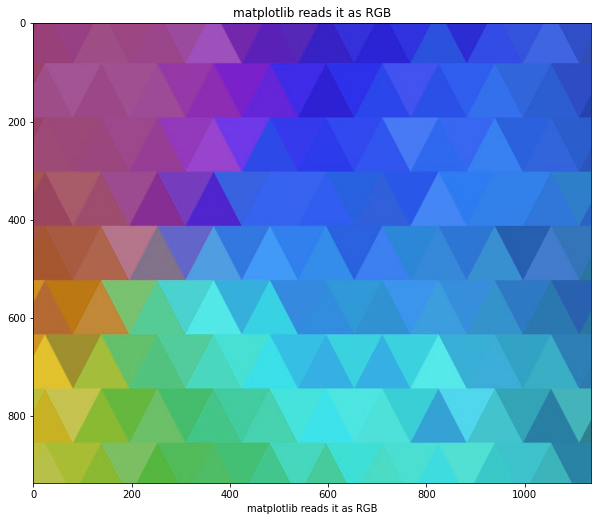

In [28]:
plt.figure(figsize = (10,10))
plt.title('matplotlib reads it as RGB')
plt.xlabel('matplotlib reads it as RGB')
plt.imshow(im)
plt.show()

In [29]:
# converting into RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

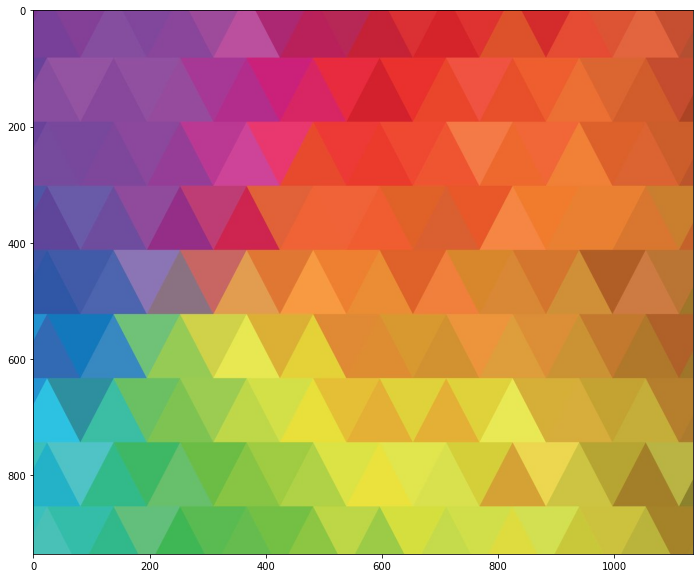

In [30]:
plt.figure(figsize = (20,10))
plt.imshow(im)
plt.show()

In [31]:
# flatten image intp linear array
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(1063296, 3)


In [32]:
# we can do it this way as well if we know the pixels
all_pixels = im.reshape((936*1136,3))
print(all_pixels.shape)

(1063296, 3)


In [33]:
from sklearn.cluster import KMeans

In [34]:
dominant_colors = 5

km = KMeans(n_clusters = dominant_colors)
(km.fit(all_pixels))

KMeans(n_clusters=5)

In [35]:
centers = km.cluster_centers_
centers

array([[219.70213824,  99.69936939,  52.5976299 ],
       [ 53.80762319, 150.70869341, 176.76896927],
       [214.51201009, 197.93491921,  64.7526108 ],
       [149.03934634,  69.45735364, 148.37642393],
       [117.32135619, 193.57284454,  86.82666568]])

In [36]:
centers = np.array(centers, dtype = 'uint8')
print(centers)

[[219  99  52]
 [ 53 150 176]
 [214 197  64]
 [149  69 148]
 [117 193  86]]


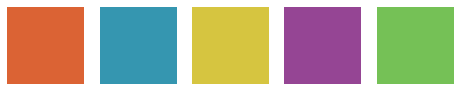

In [37]:
i = 1

plt.figure(0, figsize = (8,2))

colors = []
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis(False)
    i += 1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

In [38]:
new_img = np.zeros((936*1136,3), dtype = 'uint8')

print(new_img.shape)

(1063296, 3)


In [39]:
colors

[array([219,  99,  52], dtype=uint8),
 array([ 53, 150, 176], dtype=uint8),
 array([214, 197,  64], dtype=uint8),
 array([149,  69, 148], dtype=uint8),
 array([117, 193,  86], dtype=uint8)]

In [40]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0])

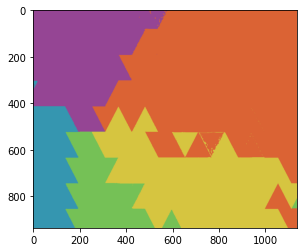

In [41]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

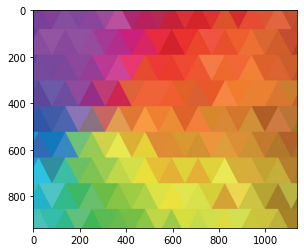

In [42]:
plt.imshow(im)
plt.show()